In [14]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get the current directory path:
notebook_dir = os.path.abspath('')

# Construct the path to the data directory:
data_dir = os.path.join(notebook_dir, '../src/data')

# Add the data directory path to the system path:
sys.path.append(data_dir)

# Import the feature-building module:
import build_features


ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = build_features.project_gdp(path_data='../data')

In [11]:
projection_arima = df[df.index < '2015-03-01']

In [ ]:
model = SARIMAX(projection_arima, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

,gdp
Quarter,
1996-03-01,99.41
1996-06-01,100.59
1996-09-01,104.31
1996-12-01,103.31
1997-03-01,104.42
...,...
2013-12-01,175.56
2014-03-01,177.00
2014-06-01,174.44


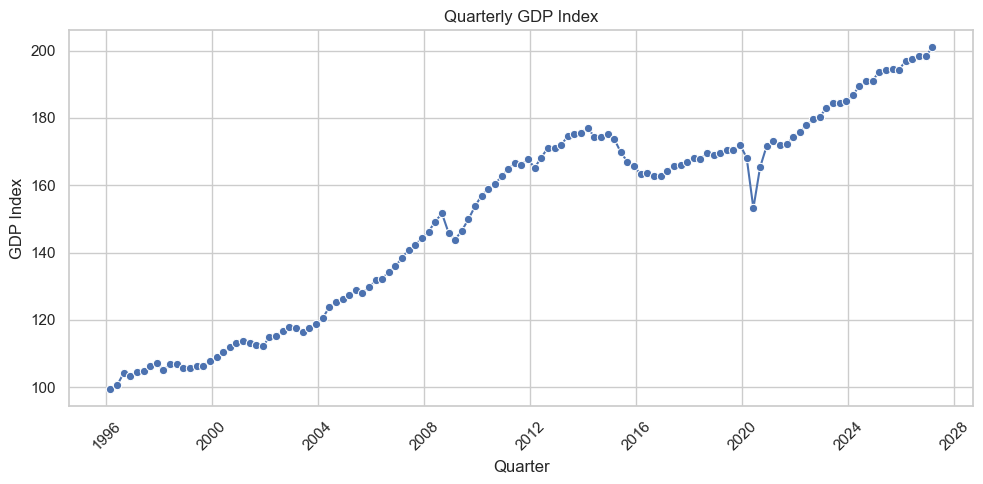

In [3]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Quarter', y='gdp', data=df, marker='o')
plt.title('Quarterly GDP Index')
plt.xlabel('Quarter')
plt.ylabel('GDP Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()